<a href="https://colab.research.google.com/github/Kkunal-Kamthan/Kkunal-Kamthan/blob/main/Final_Machine_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Title:Prediction of on time delivery of products Using machine Learning Technique

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:
df=pd.read_csv("C:\\Users\\Rahul\\Downloads\\E_customer_shipping_data.csv")

In [ ]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data profiling

In [ ]:
df.shape

(10999, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# Exploratatory Data Analysis

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


([<matplotlib.patches.Wedge at 0x7f1030b16250>,
 [Text(0.32902377754583456, 1.0496396304491695, '0'),
  Text(-0.32902377754583423, -1.0496396304491697, '1')],
 [Text(0.17946751502500063, 0.5725307075177288, '40.33%'),
  Text(-0.17946751502500047, -0.5725307075177288, '59.67%')])

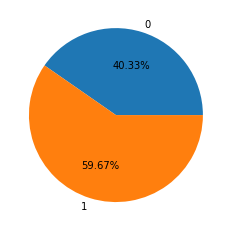

In [ ]:
delay=pd.DataFrame(df.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(df)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%1.2f%%')
# 40% of the total deliveries are not reach on time

Text(0, 0.5, 'percentage')

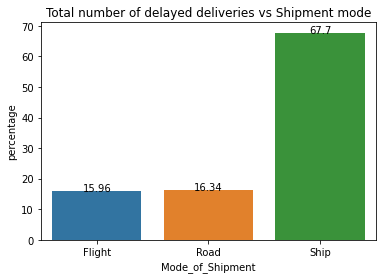

In [ ]:
data_v1 = df[df['Reached.on.Time_Y.N']==0]
data_v2=pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data_v1)*100)
data_v2=data_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data_v2 )
for index, row in data_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Shipment mode')
plt.ylabel('percentage')
# Around 68% of the delayed deliveries are caused when ships are used as a mode of shipments. So, Alternate options like Flight and Road services might be considered to reduce the delayed deliveries

Observations:

Around 68% of the delayed deliveries are caused when ships are used as a mode of shipments. So, Alternate options like Flight and Road services might be considered to reduce the delayed deliveries

Text(0, 0.5, 'percentage')

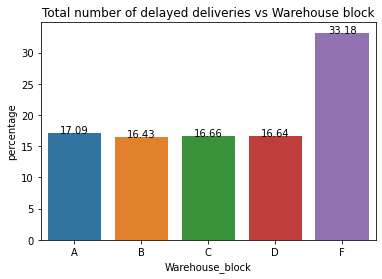

In [ ]:
data_v3=pd.DataFrame((data_v1.groupby(['Warehouse_block'])['ID'].count())/len(data_v1)*100)
data_v3=data_v3.reset_index()
visual=sns.barplot(x="Warehouse_block", y="ID", data=data_v3 )
for index, row in data_v3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Warehouse block')
plt.ylabel('percentage')

Observations

Higher percent of delayed deliveries are recorded in Warehouse block F. For rest of the block,the percent of delayed deliveries are almost consistent

Text(0.5, 1.0, 'Product importance by Reached on Time or Not')

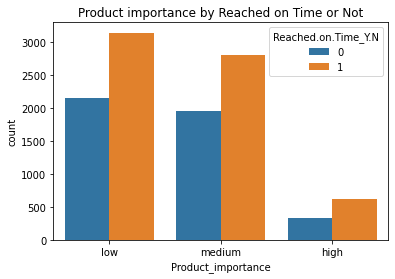

In [ ]:
sns.countplot(x = "Product_importance", data =df, hue="Reached.on.Time_Y.N")
plt.title("Product importance by Reached on Time or Not")
# Higher number of deliveries falls under low product importance. Very less number of highly important products delivered. It means customers are ordering more number of low importance products from this ecommerce group




Text(0.5, 1.0, 'Amount spent by each Gender')

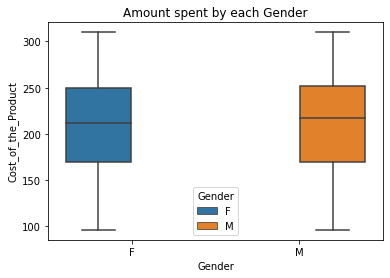

In [ ]:
sns.boxplot(x='Gender',y='Cost_of_the_Product',data=df,hue='Gender')
plt.title("Amount spent by each Gender")

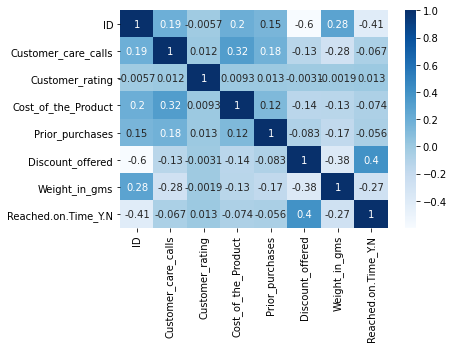

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

# Data preparation

In [ ]:
# Data Preparation
df=df.drop(['ID'],axis=1)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Chi square test of independence

In [ ]:
#Warehouse_block
crossTab = pd.crosstab(df['Warehouse_block'],df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8959524278243698


In [ ]:
#mode_of_shipment
crossTab = pd.crosstab(df['Mode_of_Shipment'],df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [ ]:
crossTab = pd.crosstab(df['Product_importance'],df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [ ]:
# Gender
crossTab = pd.crosstab(df['Gender'],df['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


Observations:

From chi square test, we can conclude that three of the independent categorical features are not related to the response variable beacause the p value is greater than 0.05. So, these features can be removed and only product importance feature can be included

In [ ]:
#Renaming the column Reached.on.Time_Y.N
df.rename(columns={'Reached.on.Time_Y.N':'Reached on Time'}, inplace=True)

In [ ]:
df=pd.get_dummies(df,columns=['Product_importance'], drop_first=True)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached on Time,Product_importance_low,Product_importance_medium
0,D,Flight,4,2,177,3,F,44,1233,1,1,0
1,F,Flight,4,5,216,2,M,59,3088,1,1,0
2,A,Flight,2,2,183,4,M,48,3374,1,1,0
3,B,Flight,3,3,176,4,M,10,1177,1,0,1
4,C,Flight,2,2,184,3,F,46,2484,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,F,1,1538,1,0,1
10995,B,Ship,4,1,232,5,F,6,1247,0,0,1
10996,C,Ship,5,4,242,5,F,4,1155,0,1,0
10997,F,Ship,5,2,223,6,M,2,1210,0,0,1


# Train-test split

In [ ]:
x=df.drop(['Reached on Time','Warehouse_block','Mode_of_Shipment','Gender'],axis=1)
y=df['Reached on Time']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Mode_of_Shipment"]=le.fit_transform(df["Mode_of_Shipment"])
df["Gender"]=le.fit_transform(df["Gender"])


In [ ]:
df.drop(columns=["Warehouse_block"])

,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached on Time,Product_importance_low,Product_importance_medium
0,0,4,2,177,3,0,44,1233,1,1,0
1,0,4,5,216,2,1,59,3088,1,1,0
2,0,2,2,183,4,1,48,3374,1,1,0
3,0,3,3,176,4,1,10,1177,1,0,1
4,0,2,2,184,3,0,46,2484,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,2,4,1,252,5,0,1,1538,1,0,1
10995,2,4,1,232,5,0,6,1247,0,0,1
10996,2,5,4,242,5,0,4,1155,0,1,0
10997,2,5,2,223,6,1,2,1210,0,0,1


In [ ]:
df.shape

(10999, 12)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

# Clasification

In [ ]:
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
pipeline_lr=Pipeline([("scalar1",MinMaxScaler()),
             ("pca1",PCA(n_components=2)),
             ("lr_classifier",LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([("scalar1",MinMaxScaler()),
             ("pca1",PCA(n_components=2)),
             ("dt_classifier",DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([("scalar1",MinMaxScaler()),
             ("pca1",PCA(n_components=2)),
             ("rf_classifier",RandomForestClassifier())])


In [ ]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_randomforest]
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
pipe_dict={0:"LogisticRegression",1:"DecisionTreeClassifier",2:"RandomForestClassifier"}

for pipe in pipelines:
    pipe.fit(xtrain,ytrain)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(xtest,ytest)))

LogisticRegression Test Accuracy:0.5827272727272728
DecisionTreeClassifier Test Accuracy:0.6272727272727273
RandomForestClassifier Test Accuracy:0.6459090909090909


In [ ]:
for i,model in enumerate(pipelines):
    if model.score(xtest,ytest)>best_accuracy:
        best_accuracy=model.score(xtest,ytest)
        best_pipeline=model
        best_classifier=1
        
print("Classifier with best accuracy:{}".format(pipe_dict[best_classifier])) 

Classifier with best accuracy:DecisionTreeClassifier


In [ ]:
ypred=model.predict(xtest)
ypred

array([0, 0, 1, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       918
           1       0.70      0.70      0.70      1282

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



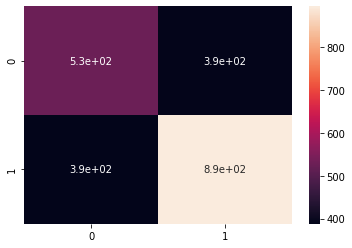

In [ ]:
# Hence Decision tree classifier has the best accuruacy
# So further process we will continue on it
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters={"max_depth":(10,30,50,70,90,100),
            "criterion":("gini","entropy"),
            "max_depth":(3,5,7,9,10),
            "max_features":("auto","sqrt","log2"),
            "min_samples_split":(2,4,6)
    
}

In [ ]:
DT_grid=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameters,cv=5,verbose=True)


In [ ]:
DT_grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DT_Model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DT_Model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(f"Train Accuracy - :{DT_Model.score(xtrain,ytrain):.3f}")
print(f"Test Accuracy - :{DT_Model.score(xtest,ytest):.3f}")


Train Accuracy - :0.711
Test Accuracy - :0.677


# ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ann = Sequential()
ann.add(Dense(14,input_dim=8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer='SGD',metrics=['accuracy'])
ann.fit(xtrain, ytrain, epochs=100, batch_size=15)

Epoch 1/100
587/587 [==============================] - 14s 1ms/step - loss: 1945143.0386 - accuracy: 0.5985
Epoch 2/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6723 - accuracy: 0.6044
Epoch 3/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6735 - accuracy: 0.5992
Epoch 4/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6762 - accuracy: 0.5921
Epoch 5/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6716 - accuracy: 0.6035
Epoch 6/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6745 - accuracy: 0.5964
Epoch 7/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6735 - accuracy: 0.5988
Epoch 8/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6771 - accuracy: 0.5900
Epoch 9/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6765 - accuracy: 0.5913
Epoch 10/100
587/587 [==============================] - 1s 1ms/step - loss: 0.6753 -

In [ ]:
predictions = (ann.predict(xtest) > 0.5)
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       918
           1       0.58      1.00      0.74      1282

    accuracy                           0.58      2200
   macro avg       0.29      0.50      0.37      2200
weighted avg       0.34      0.58      0.43      2200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Conclusion:ANN gives 58% accuracy.